# The Analytics of a Two-Asset Portfolio: Sample Lecture
This is a sample lecture that ca be taught in a Programming for Finance, Finacial Analytics, or Applied Investment course. The topic requires introductory Calculus and Introductory Probability and Statitics as prequisites.

## Finding The Efficient Frontier and Minimum Variance Portfolio

The two companies chosen to demonstrate the use of the Python language to calculate the efficient frontier were Microsoft Corporation and Costco Wholesale Corporation. 
Steps to Complete the Activity:

1.  Calculate the daily Returns 
2.  Calculate the Stocks' Statistics
3.  Set up a Portfolio and find Portfolio Statistics
4.  Find the Min Var Portfolio



## Learning Outcomes
By end of this activity  you will
- Learn how to import historical data directly from Yahoo finance into Python workspace
- Learn the basics of setting up a portfolio of two assets
- Learn how to find and visualize portfolio's Standard Deviation and Mean of historical returns
- Learn how to find Minimum Variance Portfolio and Efficient Frontier in Python



# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
#For importing historical financial data from different resources
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

The two companies chosen to demonstrate the use of the Python language to calculate the efficient frontier were Microsoft Corporation and Costco Wholesale Corporation. 
we use **pandas-datareader** to import historical stock prices 

In [2]:
# Identify which stocks are used to setup a portfolio
asset_A="MSFT"
asset_B="COST"

#The begining and end date of historical stock prices
start = datetime(2017, 7, 28)
end = datetime(2022, 7, 28)

#Import data from Yahoo Finance
asset_A_df = web.DataReader(asset_A, 'yahoo', start=start, end=end)
asset_B_df = web.DataReader(asset_B, 'yahoo', start=start, end=end)

Here we plot the  historical prices of the assets as well as the portfolio historical values using a prespecified weights for assets A & B :$W_A$ and $W_B$
assuming $100\%$ of the capital is invested on assets A & B, then $W_A=1-W_B$

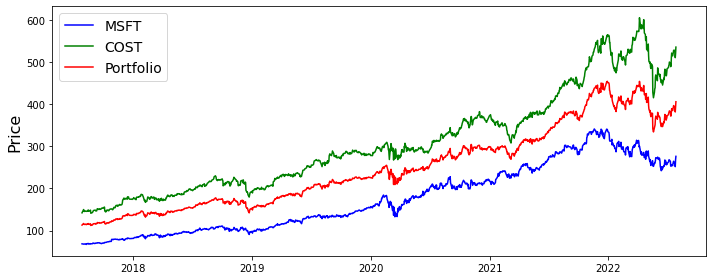

In [3]:
# Weight of first asset (asset A) in the portfolio,
w_assetA=0.5
# A new Column added to Asset B dataframe to carry the price of the portfolio
asset_B_df['portfolio']=asset_A_df.iloc[:,3]*w_assetA+asset_B_df.iloc[:,3]*(1-w_assetA)

#Plotting the historical daily prices
plt.figure(figsize=(10,4))
plt.plot(asset_A_df['Adj Close'],color='b',label=asset_A)
plt.plot(asset_B_df['Adj Close'],color='g',label=asset_B)
plt.plot(asset_B_df['portfolio'],color='r',label="Portfolio")

plt.ylabel('Price', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

The daily return of two assets can be calculated using the function pct_change(). This function computes the percentage change from the immediately previous row by default. 

Because of this, we use the function **dropna()** to remove the NaN first row created by the inexistent day before the first day.

In [4]:
asset_A_df['returns'] = asset_A_df.Close.pct_change().dropna()
asset_B_df['returns'] = asset_B_df.Close.pct_change().dropna()

returns=pd.merge(asset_A_df.returns, asset_B_df.returns, how='inner', on='Date').dropna()
returns.rename(columns= {
                        'returns_x':'%(asset)s'% {"asset":asset_A} ,
                        'returns_y':'%(asset)s'% {"asset":asset_B} 
                        },inplace= True)
print(returns.head())


                MSFT      COST
Date                          
2017-07-31 -0.004655  0.036758
2017-08-01 -0.001651  0.007634
2017-08-02 -0.004409  0.009767
2017-08-03 -0.001522 -0.020895
2017-08-04  0.007346 -0.009309


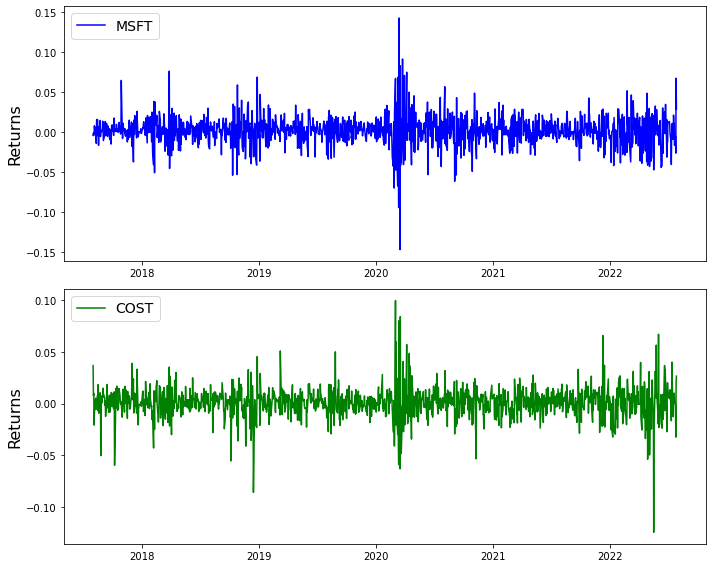

In [5]:
#Plotting the historical daily returns

plt.figure(figsize=(10,8))

#Subplot 1: MSFT returns
plt.subplot(2, 1, 1) 
plt.plot(asset_A_df['returns'],color='b',label=asset_A)
plt.ylabel('Returns', fontsize=16)
plt.legend(loc='upper left', fontsize=14)

#Subplot 2: COST returns
plt.subplot(2, 1, 2) 
plt.plot(asset_B_df['returns'],color='g',label=asset_B)
plt.ylabel('Returns', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

## Summary Statistics of daily returns

In [6]:
returns.describe()

,MSFT,COST
count,1258.000000,1258.000000
mean,0.001233,0.001109
std,0.018698,0.014916
min,-0.147390,-0.124513
25%,-0.007135,-0.005672
50%,0.001317,0.001727
75%,0.010670,0.008014
max,0.142169,0.099595


# Histogram of daily returns

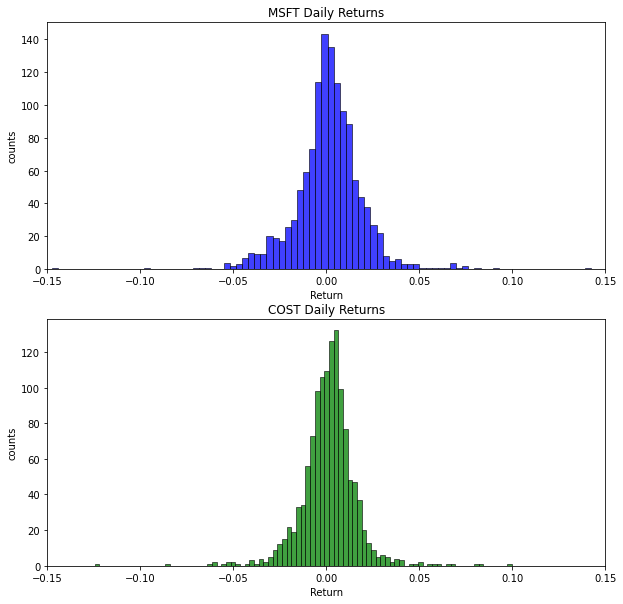

In [7]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1) 
sns.histplot(returns.iloc[:,0], color='b')
plt.xlabel('Return')
plt.xlim(left = -0.15, right=0.15)
plt.ylabel('counts')
plt.title('%(asset)s Daily Returns'% {"asset":asset_A})

plt.subplot(2, 1, 2) 
sns.histplot(returns.iloc[:,1], color='g')
plt.xlabel('Return')
plt.xlim(left = -0.15, right=0.15)
plt.ylabel('counts')
plt.title('%(asset)s Daily Returns'% {"asset":asset_B})


plt.show()

# Annualized Returns

 $R_d$ the daily return is daily compounding interest rate, to annulize the daily return we should find the effective annula interest rate (EAIR):
 
$$ \prod_{i=1}^{n}(1+R_i)=(1+EAIR)^{n/252}$$

In [8]:
n_days = returns.shape[0]
compounded_growth = (1+returns).prod()
ann_mean_returns =  compounded_growth**(252/n_days)-1

print(ann_mean_returns)

MSFT    0.305517
COST    0.285759
dtype: float64


# Annualized Variance and Standard Deviation
We can annualize the variance of daily returns to yearly returns, with the assumptions of the daily returns are independent. variance of daily returns can be multiplied by 252 (number of trading days per year) to get the variance of yearly returns.

We can annualize Standard Deviation by multiplying it by the square root of the number of periods per observation assuming daily returns are independent of eachother.  we should multiply standard deviation of daily returns by $252^{1/2}$.

In [9]:
ann_var_returns = (returns.var()*(252))
print(ann_var_returns)

MSFT    0.088103
COST    0.056066
dtype: float64


In [10]:
ann_std_returns=returns.std()*(252**0.5)
print(ann_std_returns)

MSFT    0.296822
COST    0.236783
dtype: float64


## Modern Portfolio Theory (Harry Markowitz)
Modern portfolio theory is a mathematical framework for building a portfolio of risky assets in order to optimize the expected return for a given level of risk. It reveals that since it is the return and risk of the portfolio that is of utmost importance, securities should be managed by their contribution to increasing the return and reducing the risk of the portfolio, rather than based on the risk and return levels for each individual security.

A portfolio’s performance is the result of the performance of its components
* The return realized on a portfolio is a linear combination of the returns on the individual investments
* The variance of the portfolio is not a linear combination of component variances



## Portfolio Return
Consider two securities A:'MSFT' and B:'COST', with expected returns $E(R_A)$ and $E(R_B)$, and standard deviations $σ_A$ and $σ_B$.
If the weighting of each security is $w_A$ and $w_B$, then the expected return of the portfolio is:
 $$E(R_p) = w_AE(R_A) + w_BE(R_B)$$

below we create a function 'portfolio_return' to calculate a portfolio returns by having the weights of each asset and the mean returns for each asset.

In [11]:
# Calculate the portfolio return
def portfolio_return(w, r):
   
     return np.dot(w,r)
w=np.array([0.2, 0.8])
portfolio_mean_return=portfolio_return(w,ann_mean_returns[[0,1]])
round(portfolio_mean_return,4)

0.2897

## Covariance Matrix


Matrix $V$ is the covariance Matrix of the returns of two assets A and B:


$$V=\left[\begin{matrix}\sigma_A^2&\sigma_{AB}\\\sigma_{AB}&\sigma_B^2\\\end{matrix}\right]$$

Similar to variance of daily returns, We can annualize the covariance matrix by multiplying all of the values by 252.



In [12]:
covariance_matrix = returns.cov()*(252)
print(covariance_matrix)

          MSFT      COST
MSFT  0.088103  0.041410
COST  0.041410  0.056066


## Portfolio Standard Deviation
However, when considering the standard deviation of the portfolio, we not only have to consider the standard deviation of each security but also the correlations or co-movements in the returns of the securities. 

For example, the returns of two bank stocks will be highly correlated because they are in the same industry, whereas the returns of a bank stock and an oil stock will be less correlated due to the completely different industries.

The portfolio variance will be unlike the expected return, the portfolio variance is not a weighted average of the variances of individual assets,as the assets are corrolated. Variance of portfolio can be calculated using this formula:

$$\sigma_p^2=w' Vw=\left[\begin{matrix}w_A&w_B\\\end{matrix}\right]\left[\begin{matrix}\sigma_A^2&\sigma_{AB}\\\sigma_{AB}&\sigma_B^2\\\end{matrix}\right]\left[\begin{matrix}w_A\\w_B\\\end{matrix}\right]$$

 $$σ_p^2 = (w_Aσ_A)^2 + (w_Bσ_B)^2 + 2(w_Aw_B)\sigma_{AB}$$
where $\sigma_{AB}$ is the covariance of the returns on security A and B.

Below function 'portfolio_std' is defined to caclulate a portfolio standard deviation by passing the weights and a covariance matrix. '.dot()' will perform matrix multipication.



In [13]:
# Calculate the portfolio Standard Deviation
def portfolio_std(w, covmat):
   
    return (w.dot(covmat).dot(w))**0.5
portfolio_std_return=portfolio_std(w,covariance_matrix)
round(portfolio_std_return,4)

0.2295

In [14]:
n_points=20
w=np.linspace(0,1,20)
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

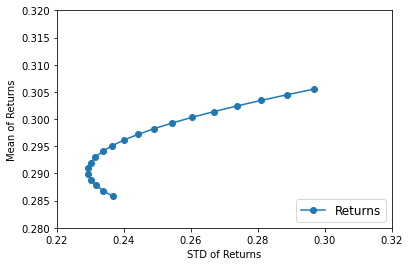

In [15]:
rets = [portfolio_return(w, ann_mean_returns[[0,1]]) for w in weights]
stds = [portfolio_std(w, covariance_matrix) for w in weights]
ef = pd.DataFrame({
        "Returns": rets, 
        "Stds": stds,
        "weights":w
    })
ef.plot.line(x="Stds", y="Returns", style="o-")
plt.xlabel('STD of Returns')
plt.ylabel('Mean of Returns')
plt.ylim(bottom=0.28,top=0.32)
plt.xlim(left = 0.22, right=0.32)
plt.legend(loc='lower right', fontsize=12)


# Minimum Variance Portfolio
The portfolio that appears to the farthest left on every line is referred to as the minimum variance portfolio, i.e. the portfolio that will exhibit the least risk. As mentioned above,  The entire line is referred to as the minimum variance frontier – the minimum variance for any level of expected return. 


For a two-security minimum variance portfolio, the proportions invested in stocks A and B are:
$$𝑤_𝐴= \frac{σ_B^2-\sigma_{AB}}{σ_A^2+σ_B^2-2\sigma_{AB}} $$

$$𝑤_𝐵=1−𝑤_𝐴$$


In [16]:
print(covariance_matrix)
cov_m=covariance_matrix

          MSFT      COST
MSFT  0.088103  0.041410
COST  0.041410  0.056066


In [17]:
w_assetA=(cov_m.iloc[1,1]-cov_m.iloc[1,0]) / (cov_m.iloc[0,0]+cov_m.iloc[1,1]-2*cov_m.iloc[1,0])
w_assetB=1-w_assetA
w=np.array([w_assetA, w_assetB])
minvarP_mean_return=portfolio_return(w,ann_mean_returns[[0,1]])
minvarP_std_return=portfolio_std(w,covariance_matrix)
w

array([0.23889974, 0.76110026])

# Efficient Frontier
The efficient frontier is just the part of the line that includes all the dominant portfolios or efficient portfolios, i.e. the best return for that level of risk. We can see from the above that when the coefficient is negative, there is always a portfolio that produces a higher return than A, with lower risk.

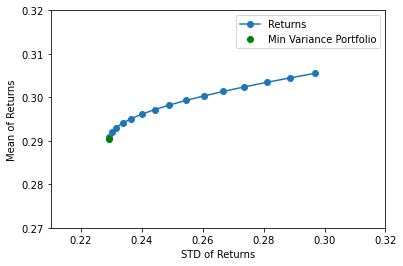

In [18]:
efrontier = ef[ef['weights'] > w_assetA]
efrontier.plot.line(x="Stds", y="Returns", style="o-")
#ef.plot.line(x="Stds", y="Returns", style="o-")
plt.xlabel('STD of Returns')
plt.ylabel('Mean of Returns')
plt.ylim(bottom=0.27,top=0.32)
plt.xlim(left = 0.21, right=0.32)
plt.legend(loc='lower right', fontsize=12)
plt.plot(minvarP_std_return,minvarP_mean_return,'go', label='Min Variance Portfolio')
plt.legend()

